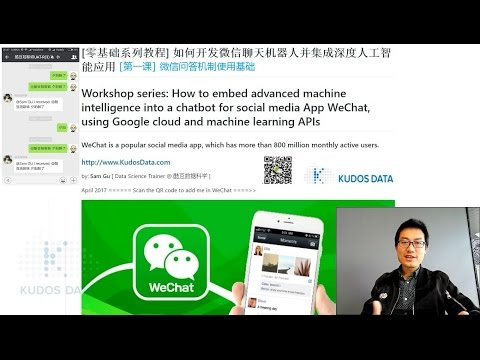

In [1]:
import IPython.display
IPython.display.YouTubeVideo('W-ZsWqcl1_c')

# 如何使用和开发微信聊天机器人的系列教程
# A workshop to develop & use an intelligent and interactive chat-bot in WeChat

### WeChat is a popular social media app, which has more than 800 million monthly active users.

<img src='reference/logo.png' width=12% style="float: right;">
<img src='reference/WeChat_SamGu_QR.png' width=10% style="float: right;">

### http://www.KudosData.com

by: Sam.Gu@KudosData.com


October 2018 : Update to support Python 3 in local machine, e.g. iss-vm.


April 2017 ========== Scan the QR code to become trainer's friend in WeChat ========>>

### 第一课：使用微信问答机制
### Lesson 1: Basic usage of WeChat Python API
* 使用和开发微信个人号聊天机器人：一种Python编程接口 (Use WeChat Python API)
* 用微信App扫QR码图片来自动登录 (Log-in, contact scan, and processing of text, image, file, video, etc)
* 查找指定联系人或群组 (Scan ccontact list)
* 发送信息（文字、图片、文件、音频、视频等） (Send message: text, image, file, voice, video, etc)
* 接收信息 (Receive message, and keep 'listening')
* 自动回复 (Receive message and then automaticaly reply)
* 自定义复杂消息处理，例如：信息存档、回复群组中被@的消息 (Advanced message processing and reply)

### Imports / 导入需要用到的一些功能程序库：

In [2]:
# from __future__ import unicode_literals, division
import time, datetime, requests, itchat
from itchat.content import *

### * Log in using QR code image / 用微信App扫QR码图片来自动登录

In [3]:
# itchat.auto_login(hotReload=True) # hotReload=True: 退出程序后暂存登陆状态。即使程序关闭，一定时间内重新开启也可以不用重新扫码。
itchat.auto_login(enableCmdQR=-2) # enableCmdQR=-2: 命令行显示QR图片

Getting uuid of QR code.


                                                                              
  ██████████████      ██████  ████████  ████████████  ██████  ██████████████  
  ██          ██  ████    ████          ██    ██    ██        ██          ██  
  ██  ██████  ██    ████      ████████    ██    ████    ████  ██  ██████  ██  
  ██  ██████  ██    ██████            ██    ██  ██████    ██  ██  ██████  ██  
  ██  ██████  ██          ██  ██████████    ██        ████    ██  ██████  ██  
  ██          ██  ██    ██    ██████    ████        ██    ██  ██          ██  
  ██████████████  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██████████████  
                  ██  ██████        ████        ██    ██                      
          ████████              ████      ██  ██████  ██████  ████      ██    
    ████  ████    ██████    ██  ██  ██  ████████  ██    ██    ██  ████  ██    
  ████    ██  ██    ██  ██          ████  ████  ██  ██████  ██      ████      
  ██████    ██  ██  ██████████  ████    ██      ██  

Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 白黑


### * Locate User or Group / 查找指定联系人或群组

使用search_friends方法可以搜索用户，有几种搜索方式： 


1.仅获取自己的用户信息 


2.获取昵称'NickName'、微信号'Alias'、备注名'RemarkName'中的任何一项等于name键值的用户 


3.获取分别对应相应键值的用户

In [4]:
# Check Self Info / 获取自己的用户信息，返回自己的属性字典
friend = itchat.search_friends()
print(friend)

{'MemberList': <ContactList: []>, 'UserName': '@3d8ae5a3472497fad40d3cc462961688', 'City': '', 'DisplayName': '', 'PYQuanPin': 'baihei', 'RemarkPYInitial': '', 'Province': '', 'KeyWord': 'Tel', 'RemarkName': '', 'PYInitial': 'BH', 'EncryChatRoomId': '', 'Alias': '', 'Signature': '', 'NickName': '白黑', 'RemarkPYQuanPin': '', 'HeadImgUrl': '/cgi-bin/mmwebwx-bin/webwxgeticon?seq=660013402&username=@3d8ae5a3472497fad40d3cc462961688&skey=@crypt_a75926a_4df998e98bcb57f872c1ca5143032ae8', 'UniFriend': 0, 'Sex': 1, 'AppAccountFlag': 0, 'VerifyFlag': 0, 'ChatRoomId': 0, 'HideInputBarFlag': 0, 'AttrStatus': 100904893, 'SnsFlag': 177, 'MemberCount': 0, 'OwnerUin': 0, 'ContactFlag': 2053, 'Uin': 965176200, 'StarFriend': 0, 'Statues': 0, 'WebWxPluginSwitch': 0, 'HeadImgFlag': 1, 'IsOwner': 0}


In [5]:
print('NickName  : %s' % friend['NickName'])
print('Alias A-ID: %s' % friend['Alias'])
print('RemarkName: %s' % friend['RemarkName'])
print('UserName  : %s' % friend['UserName'])

NickName  : 白黑
Alias A-ID: 
RemarkName: 
UserName  : @3d8ae5a3472497fad40d3cc462961688


In [17]:
# Locate User / 获取任何一项等于name键值的用户。
# 'NickName' 昵称, set by that friend, changeable
# 'Alias' ID微信号 = wechatAccount, one time set by that friend, cannot change
# 'RemarkName' 备注名, set by current login account owner, changeable by login account owner
# 注意：返回可能包含多个朋友。为什么呢？

friend = itchat.search_friends(name=u'Nick')
# friend = itchat.search_friends(name=u'Mr. R')
# friend = itchat.search_friends(name=u'Ms. S')

In [18]:
for i in range(0, len(friend)):
    print('NickName  : %s' % friend[i]['NickName'])
    print('Alias A-ID: %s' % friend[i]['Alias'])
    print('RemarkName: %s' % friend[i]['RemarkName'])
    print('UserName  : %s' % friend[i]['UserName'])

NickName  : Nick
Alias A-ID: 
RemarkName: Nick
UserName  : @9efc24ef6c7f402c93ed599990b5369b97c0e8b3ab0ff7769ca39fdc1e756525
NickName  : Nick
Alias A-ID: 
RemarkName: X 薛周银
UserName  : @1d9c179af6bf5aa68b6fcc2bb0a1b9ae


In [23]:
# Locate User / 获取分别对应相应键值的用户。

# friend = itchat.search_friends(nickName=u'Nick')
# friend = itchat.search_friends(wechatAccount=u'Nick')
friend = itchat.search_friends(remarkName=u'Nick')
# friend = itchat.search_friends(userName=u'Nick')

In [24]:
for i in range(0, len(friend)):
    print('NickName  : %s' % friend[i]['NickName'])
    print('Alias A-ID: %s' % friend[i]['Alias'])
    print('RemarkName: %s' % friend[i]['RemarkName'])
    print('UserName  : %s' % friend[i]['UserName'])

NickName  : Nick
Alias A-ID: 
RemarkName: Nick
UserName  : @9efc24ef6c7f402c93ed599990b5369b97c0e8b3ab0ff7769ca39fdc1e756525


In [25]:
# Locate Group / 查找群组
# group = itchat.search_chatrooms(name=u'Data Science')
group = itchat.search_chatrooms(name=u'陪聊妹UAT')

In [26]:
for i in range(0, len(group)):
    print('NickName  : %s' % group[i]['NickName'])
    print('Alias A-ID: %s' % group[i]['Alias'])
    print('RemarkName: %s' % group[i]['RemarkName'])
    print('UserName  : %s' % group[i]['UserName'])
    print('Is Owner? : %s ( 0 for No | 1 for Yes )' % group[0]['IsOwner'])
    print('Is Admin? : %s' % group[i]['IsAdmin'])
    print('')

NickName  : 酷豆陪聊妹UAT-R
Alias A-ID: 
RemarkName: 
UserName  : @@0da7017792ef60e01a21d7b882aad186edcc6fd00c68af34aef5cb48dc30e78c
Is Owner? : 0 ( 0 for No | 1 for Yes )
Is Admin? : None

NickName  : 酷豆陪聊妹UAT-B
Alias A-ID: 
RemarkName: 
UserName  : @@e30bd675e5aa2c2c84e853e262cdef876fa6fc7a0f72a219e25c374e58e9c03e
Is Owner? : 0 ( 0 for No | 1 for Yes )
Is Admin? : None

NickName  : 酷豆陪聊妹UAT-X
Alias A-ID: 
RemarkName: 
UserName  : @@559e081666244e73673bbbc03abbc27a9b83dbd2fe037284b795a8ade74e9590
Is Owner? : 0 ( 0 for No | 1 for Yes )
Is Admin? : None

NickName  : 酷豆陪聊妹UAT-S
Alias A-ID: 
RemarkName: 
UserName  : @@88c7ade51415a08a6ecd3556c186abce9ac7ed02a2f7442760934f6b788d6e35
Is Owner? : 0 ( 0 for No | 1 for Yes )
Is Admin? : None



### * Interactive Conversation : Send / 发送信息（文字、图片、文件、音频、视频等）

In [31]:
# Locate User / 获取分别对应相应键值的用户。

# friend = itchat.search_friends(nickName=u'白黑')
# friend = itchat.search_friends(wechatAccount=u'白黑')
# friend = itchat.search_friends(remarkName=u'白黑')
# friend = itchat.search_friends(userName=u'白黑')
friend = itchat.search_friends(name=u'白黑')

In [32]:
for i in range(0, len(friend)):
    print('NickName  : %s' % friend[i]['NickName'])
    print('Alias A-ID: %s' % friend[i]['Alias'])
    print('RemarkName: %s' % friend[i]['RemarkName'])
    print('UserName  : %s' % friend[i]['UserName'])

NickName  : 白黑
Alias A-ID: 
RemarkName: 
UserName  : @3d8ae5a3472497fad40d3cc462961688


In [42]:
# Text / 文字
# English
reply = itchat.send(u'Nice to meet you in this course！\nTime Sent:\n{:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now()), friend[0]['UserName']) 
# Chinese
# reply = itchat.send(u'别来无恙啊！\n发送时间:\n{:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now()), friend[0]['UserName']) 
print(reply['BaseResponse']['ErrMsg'])

请求成功


In [34]:
# Picture / 图片
reply = itchat.send_image('./reference/WeChat_SamGu_QR.png', friend[0]['UserName']) 
print(reply['BaseResponse']['ErrMsg'])

请求成功


In [35]:
# Document / 文件
reply = itchat.send_file('./reference/logo.pdf', friend[0]['UserName']) 
print(reply['BaseResponse']['ErrMsg'])

请求成功


In [36]:
# Audio / 音频（语音可以先转成MP3）
reply = itchat.send_file('./reference/audio.mp3', friend[0]['UserName']) 
print(reply['BaseResponse']['ErrMsg'])

请求成功


In [37]:
# Video / 视频
reply = itchat.send_video('./reference/video.mp4', friend[0]['UserName']) 
print(reply['BaseResponse']['ErrMsg'])

请求成功


In [39]:
# Locate Group / 查找群组
# group = itchat.search_chatrooms(name=u'Data Science')
group = itchat.search_chatrooms(name=u'陪聊妹UAT-S')

In [40]:
for i in range(0, len(group)):
    print('NickName  : %s' % group[i]['NickName'])
    print('Alias A-ID: %s' % group[i]['Alias'])
    print('RemarkName: %s' % group[i]['RemarkName'])
    print('UserName  : %s' % group[i]['UserName'])
    print('Is Owner? : %s ( 0 for No | 1 for Yes )' % group[0]['IsOwner'])
    print('Is Admin? : %s' % group[i]['IsAdmin'])
    print('')

NickName  : 酷豆陪聊妹UAT-S
Alias A-ID: 
RemarkName: 
UserName  : @@88c7ade51415a08a6ecd3556c186abce9ac7ed02a2f7442760934f6b788d6e35
Is Owner? : 0 ( 0 for No | 1 for Yes )
Is Admin? : None



In [41]:
# 发送信息去群组： group[0]['UserName']
# Text / 文字
# English
reply = itchat.send(u'Nice to meet you in this course！\nTime Sent:\n{:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now()), group[0]['UserName']) 
# Chinese
# reply = itchat.send(u'别来无恙啊！\n发送时间:\n{:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now()), group[0]['UserName']) 
print(reply['BaseResponse']['ErrMsg'])

请求成功


### *  Interactive Conversation : Receive / 接收信息

显示发给自己的文本消息：

In [ ]:
# itchat.auto_login(hotReload=True) # hotReload=True: 退出程序后暂存登陆状态。即使程序关闭，一定时间内重新开启也可以不用重新扫码。

In [ ]:
@itchat.msg_register(itchat.content.TEXT)
def text_reply(msg):
    print(msg['Text'])

In [ ]:
# 长期有效地运行（术语叫做：开始监听）
itchat.run()

回复发给自己的文本消息：

In [ ]:
# interupt, then re-login
itchat.auto_login(hotReload=True)

In [ ]:
@itchat.msg_register(itchat.content.TEXT)
def text_reply(msg):
    print(msg['Text'])
    return u'Thank you! 谢谢亲[嘴唇]我收到 I received:\n' + msg['Text']

In [ ]:
itchat.run()

### *  Interactive Conversation : Auto Mode / 自定义复杂消息处理，例如：信息存档、回复群组中被@的消息

In [ ]:
# interupt, then re-login
itchat.auto_login(hotReload=True)

In [43]:
# 如果收到[TEXT, MAP, CARD, NOTE, SHARING]类的信息，会自动回复：
@itchat.msg_register([TEXT, MAP, CARD, NOTE, SHARING]) # 文字、位置、名片、通知、分享
def text_reply(msg):
    print(u'[ Terminal Info ] Thank you! 谢谢亲[嘴唇]我已收到 I received: [ %s ] %s From: %s' 
          % (msg['Type'], msg['Text'], msg['FromUserName']))
    itchat.send(u'Thank you! 谢谢亲[嘴唇]我已收到\nI received:\n[ %s ]\n%s' % (msg['Type'], msg['Text']), msg['FromUserName'])

# 如果收到[PICTURE, RECORDING, ATTACHMENT, VIDEO]类的信息，会自动保存：
@itchat.msg_register([PICTURE, RECORDING, ATTACHMENT, VIDEO]) # 图片、语音、文件、视频
def download_files(msg):
    msg['Text'](msg['FileName'])
    print(u'[ Terminal Info ] Thank you! 谢谢亲[嘴唇]我已收到 I received: [ %s ] %s From: %s' 
          % ({'Picture': 'img', 'Video': 'vid'}.get(msg['Type'], 'fil'), msg['FileName'], msg['FromUserName']))
    itchat.send(u'Thank you! 谢谢亲[嘴唇]我已收到\nI received:', msg['FromUserName'])
    return '@%s@%s' % ({'Picture': 'img', 'Video': 'vid'}.get(msg['Type'], 'fil'), msg['FileName'])

# 如果收到新朋友的请求，会自动通过验证添加加好友，并主动打个招呼：幸会幸会！Nice to meet you!
@itchat.msg_register(FRIENDS)
def add_friend(msg):
    print(u'[ Terminal Info ] New Friend Request 新朋友的请求，自动通过验证添加加好友 From: %s' % msg['RecommendInfo']['UserName']) 
    itchat.add_friend(**msg['Text']) # 该操作会自动将新好友的消息录入，不需要重载通讯录
    itchat.send_msg(u'幸会幸会！Nice to meet you!', msg['RecommendInfo']['UserName'])

# 在群里，如果收到@自己的文字信息，会自动回复：
@itchat.msg_register(TEXT, isGroupChat=True)
def text_reply(msg):
    if msg['isAt']:
        print(u'[ Terminal Info ] Group@Info 在群里收到@自己的文字信息: %s From: %s %s' 
              % (msg['Content'], msg['ActualNickName'], msg['FromUserName']))
        itchat.send(u'@%s\u2005I received: %s' % (msg['ActualNickName'], msg['Content']), msg['FromUserName'])


In [44]:
itchat.run()

Start auto replying.


[ Terminal Info ] Thank you! 谢谢亲[嘴唇]我已收到 I received: [ Text ] Hi  From: @3d8ae5a3472497fad40d3cc462961688
[ Terminal Info ] Thank you! 谢谢亲[嘴唇]我已收到 I received: [ fil ] 181025-105640.mp3 From: @3d8ae5a3472497fad40d3cc462961688


Bye~


In [45]:
# interupt, then logout
itchat.logout() # 安全退出

<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>

LOG OUT!


### 恭喜您！已经能够使用微信问答机制了。
* 使用和开发微信个人号聊天机器人：一种Python编程接口 (Use WeChat Python API)
* 用微信App扫QR码图片来自动登录 (Log-in, contact scan, and processing of text, image, file, video, etc)
* 查找指定联系人或群组 (Scan ccontact list)
* 发送信息（文字、图片、文件、音频、视频等） (Send message: text, image, file, voice, video, etc)
* 接收信息 (Receive message, and keep 'listening')
* 自动回复 (Receive message and then automaticaly reply)
* 自定义复杂消息处理，例如：信息存档、回复群组中被@的消息 (Advanced message processing and reply)

### 下一课是第二课：图像识别和处理
### Lesson 2: Image Recognition & Processing
* 识别图片消息中的物体名字 (Recognize objects in image)
* 识别图片消息中的文字 (OCR: Extract text from image)
* 识别人脸 (Recognize human face)
* 基于人脸的表情来识别喜怒哀乐等情绪 (Identify semtiment and emotion from human face)

<img src='reference/WeChat_SamGu_QR.png' width=80% style="float: left;">

---